In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Basic Info

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train_id=df_train['Id']
df_test_id=df_test['Id']
df_train.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

## Dependent Variable

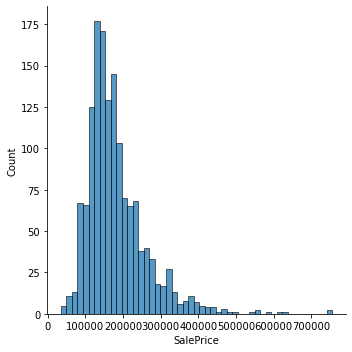

In [8]:
sns.displot(df_train['SalePrice']);

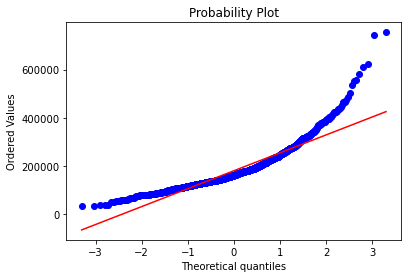

In [9]:
from scipy import stats
dep=stats.probplot(df_train['SalePrice'],plot=plt)

In [10]:
df_train['SalePrice']=np.log1p(df_train['SalePrice'])

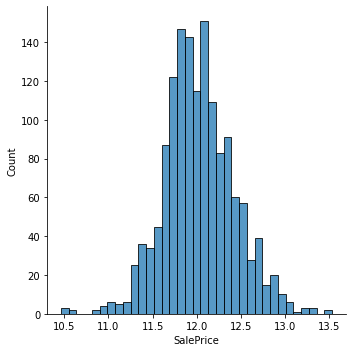

In [11]:
sns.displot(df_train['SalePrice']);

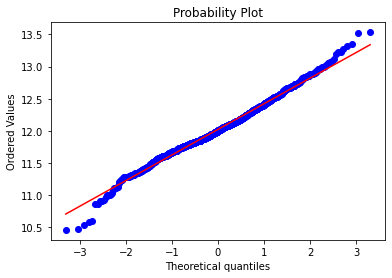

In [12]:
dep=stats.probplot(df_train['SalePrice'],plot=plt)

In [13]:
df_train['SalePrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

## Independent Variable

In [14]:
df_all=pd.concat((df_train,df_test)).reset_index(drop=True)
df_all.drop('SalePrice',axis=1,inplace=True)
df_all.shape

(2919, 79)

### Outliers

In [15]:
df_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [16]:
years=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
df_all[years].max()

YearBuilt       2010.0
YearRemodAdd    2010.0
GarageYrBlt     2207.0
YrSold          2010.0
dtype: float64

In [18]:
mask=(df_all[years]>2018).any(axis=1)
df_all[mask]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2592,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial


In [19]:
df_all[mask]['YearBuilt']

2592    2006
Name: YearBuilt, dtype: int64

In [20]:
df_all.loc[mask, 'GarageYrBlt']=df_all[mask]['YearBuilt']

### Normalization

In [21]:
from scipy.stats import norm, skew
num_feats=df_all.dtypes[df_all.dtypes!="object"].index
num_data=df_all[num_feats]
skewed_feats=num_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
new_skewness = skewness[skewness.abs() > 0.75]

In [22]:
from scipy.special import boxcox1p

skewed_features = new_skewness.index 
lam = 0.15
for feat in skewed_features:
    df_all[feat]=boxcox1p(df_all[feat], lam)

### Missing Value

In [23]:
data_missing=(df_all.isnull().sum())/df_all.shape[0]*100
data_missing=data_missing.drop(data_missing[data_missing==0].index).sort_values(ascending=False)
data_missing=pd.DataFrame({'Missing_ratio':data_missing})
data_missing.head(5)

,Missing_ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797


In [24]:
df_all['MiscFeature']=df_all['MiscFeature'].fillna('None')
df_all['MasVnrType']=df_all['MasVnrType'].fillna('None')
df_all['MasVnrArea']=df_all['MasVnrArea'].fillna(0)

In [25]:
df_all['PoolQC']=df_all['PoolQC'].fillna('None')
df_all['Fence']=df_all['Fence'].fillna('None')
df_all['Alley']=df_all['Alley'].fillna('None')

In [26]:
for c in ('GarageFinish','GarageQual','GarageCond','GarageType'):
    df_all[c]=df_all[c].fillna('None')
for c in ('BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1'):
    df_all[c]=df_all[c].fillna('None')
df_all['FireplaceQu']=df_all['FireplaceQu'].fillna('None')

In [27]:
for c in ('GarageYrBlt','GarageArea','GarageCars'):
    df_all[c]=df_all[c].fillna(0)
for c in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','TotalBsmtSF'):
    df_all[c]=df_all[c].fillna(0)

In [28]:
df_all['MSZoning']=df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['SaleType']=df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])
df_all['Electrical']=df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual']=df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Exterior2nd']=df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['Exterior1st']=df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Utilities']=df_all['Utilities'].fillna(df_all['Utilities'].mode()[0])

In [29]:
df_all['LotFrontage']=df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median())) 

In [30]:
df_all['Functional']=df_all['Functional'].fillna('Typ') #注意

In [31]:
df_all.isnull().sum().max()

0

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
df_all.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5.684507,RL,5.831328,19.212182,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,2.055642,14.187527,14.187527,Gable,CompShg,VinylSd,VinylSd,BrkFace,8.059126,Gd,TA,PConc,Gd,TA,No,GLQ,11.170327,Unf,0.0,7.483296,11.692623,GasA,Ex,Y,SBrkr,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,Gd,2.602594,Typ,0.000000,None,Attchd,14.187527,RFn,1.194318,10.506271,TA,TA,Y,0.000000,5.714669,0.000000,0.0,0.0,0.0,None,None,None,0.0,1.194318,14.195323,WD,Normal
1,3.858807,RL,6.221214,19.712205,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,2.259674,2.602594,14.145138,14.145138,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,12.062832,Unf,0.0,8.897844,12.792276,GasA,Ex,Y,SBrkr,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,TA,2.259674,Typ,0.730463,TA,Attchd,14.145138,RFn,1.194318,10.062098,TA,TA,Y,9.010206,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,2.055642,14.193765,WD,Normal
2,5.684507,RL,5.914940,20.347241,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2.440268,2.055642,14.184404,14.185966,Gable,CompShg,VinylSd,VinylSd,BrkFace,7.646538,Gd,TA,PConc,Gd,TA,Mn,GLQ,10.200343,Unf,0.0,9.917060,11.892039,GasA,Ex,Y,SBrkr,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,Gd,2.259674,Typ,0.730463,TA,Attchd,14.184404,RFn,1.194318,10.775536,TA,TA,Y,0.000000,5.053371,0.000000,0.0,0.0,0.0,None,None,None,0.0,2.750250,14.195323,WD,Normal
3,5.968981,RL,5.684507,19.691553,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,2.440268,2.055642,14.047529,14.135652,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,8.274266,Unf,0.0,10.468500,11.354094,GasA,Gd,Y,SBrkr,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,Gd,2.440268,Typ,0.730463,Gd,Detchd,14.179714,Unf,1.540963,10.918253,TA,TA,Y,0.000000,4.745132,8.797736,0.0,0.0,0.0,None,None,None,0.0,1.194318,14.192207,WD,Abnorml
4,5.684507,RL,6.314735,21.325160,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.602594,2.055642,14.182841,14.182841,Gable,CompShg,VinylSd,VinylSd,BrkFace,9.391827,Gd,TA,PConc,Gd,TA,Av,GLQ,10.971129,Unf,0.0,10.221051,12.510588,GasA,Ex,Y,SBrkr,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,Gd,2.750250,Typ,0.730463,TA,Attchd,14.182841,RFn,1.540963,11.627708,TA,TA,Y,8.013884,6.314735,0.000000,0.0,0.0,0.0,None,None,None,0.0,3.128239,14.195323,WD,Normal


### Data Type

In [34]:
df_all['MSSubClass']=df_all['MSSubClass'].astype(str)
df_all['YrSold']=df_all['YrSold'].astype(str)
df_all['MoSold']=df_all['MoSold'].astype(str)

In [35]:
grades=['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond','HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
literal=['Ex', 'Gd', 'TA', 'Fa', 'Po','None']
num=[5, 4, 3, 2, 1, 0]
G=dict(zip(literal, num))

df_all[grades]=df_all[grades].replace(G)

In [36]:
grades=['Street','Alley']
literal=['Grvl','Pave','None']
num=[1,2,0]
G=dict(zip(literal, num))

df_all[grades]=df_all[grades].replace(G)

In [37]:
literal=['Reg','IR1','IR2','IR3']
num=[4,3,2,1]
G=dict(zip(literal, num))

df_all['LotShape']=df_all['LotShape'].replace(G)

In [38]:
literal=['Gtl','Mod','Sev']
num=[3,2,1]
G=dict(zip(literal, num))

df_all['LandSlope']=df_all['LandSlope'].replace(G)

In [39]:
literal=['Y','P','N']
num=[3,2,1]
G=dict(zip(literal, num))

df_all['PavedDrive']=df_all['PavedDrive'].replace(G)

In [40]:
literal=['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal']
num=[7,6,5,4,3,2,1]
G=dict(zip(literal, num))

df_all['Functional']=df_all['Functional'].replace(G)

In [41]:
df_all=pd.get_dummies(df_all, dummy_na=True)

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MSSubClass_3.858806663498184,MSSubClass_4.492017742920502,MSSubClass_4.969939052451073,MSSubClass_5.172534928709971,MSSubClass_5.357203202420049,MSSubClass_5.684506656824126,MSSubClass_5.968980585391403,MSSubClass_6.098626104970388,MSSubClass_6.221213632878419,MSSubClass_6.337529394588084,MSSubClass_6.448232316019433,MSSubClass_7.020909424392293,MSSubClass_7.483295642295591,MSSubClass_7.620056264664793,MSSubClass_7.873203454932757,MSSubClass_7.990963041593332,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electri

In [42]:
num_feats=df_all.dtypes[df_all.dtypes!="object"].index  
df_all[num_feats]=df_all[num_feats].apply(lambda x: (x-x.mean())/x.std())

In [43]:
df_all.head(10)

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MSSubClass_3.858806663498184,MSSubClass_4.492017742920502,MSSubClass_4.969939052451073,MSSubClass_5.172534928709971,MSSubClass_5.357203202420049,MSSubClass_5.684506656824126,MSSubClass_5.968980585391403,MSSubClass_6.098626104970388,MSSubClass_6.221213632878419,MSSubClass_6.337529394588084,MSSubClass_6.448232316019433,MSSubClass_7.020909424392293,MSSubClass_7.483295642295591,MSSubClass_7.620056264664793,MSSubClass_7.873203454932757,MSSubClass_7.990963041593332,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electri

## Regression

In [44]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [45]:
X_train=df_all[:df_train.shape[0]]
X_test=df_all[df_train.shape[0]:]
y_train=df_train.SalePrice

In [46]:
X_train=X_train.dropna(axis='columns')

In [47]:
X_test=X_test.dropna(axis='columns')

In [48]:
X_train

,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MSSubClass_3.858806663498184,MSSubClass_4.492017742920502,MSSubClass_4.969939052451073,MSSubClass_5.172534928709971,MSSubClass_5.357203202420049,MSSubClass_5.684506656824126,MSSubClass_5.968980585391403,MSSubClass_6.098626104970388,MSSubClass_6.221213632878419,MSSubClass_6.337529394588084,MSSubClass_6.448232316019433,MSSubClass_7.020909424392293,MSSubClass_7.483295642295591,MSSubClass_7.620056264664793,MSSubClass_7.873203454932757,MSSubClass_7.990963041593332,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_M

In [49]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [50]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

Heating_OthW............. -4.3959e+11
Heating_Grav............. -3.9878e+11
Exterior1st_ImStucc...... -3.8817e+11
Heating_GasA............. -3.8358e+11
MSZoning_RH.............. -3.4377e+11


In [53]:
Ls = LassoCV()
Ls.fit(X_train, y_train)

LassoCV()

In [52]:
maxcoef=np.argsort(-np.abs(Ls.coef_))
coef=Ls.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

GrLivArea................  1.2770e-01
OverallQual..............  6.7265e-02
YearBuilt................  4.4188e-02
LotArea..................  3.4163e-02
GarageCars...............  3.3980e-02


In [54]:
Rr = RidgeCV()
Rr.fit(X_train, y_train)

/Users/lillian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [55]:
maxcoef = np.argsort(-np.abs(Rr.coef_))
coef = Rr.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

GrLivArea................  1.0536e-01
TotalBsmtSF..............  6.4875e-02
OverallQual..............  4.8344e-02
YearBuilt................  4.4956e-02
LotArea..................  3.8800e-02


In [56]:
EN = ElasticNetCV(l1_ratio=np.linspace(0.1, 1.0, 5)) # we are essentially smashing most of the Rr model here
train_EN = EN.fit(X_train, y_train)

In [57]:
maxcoef = np.argsort(-np.abs(EN.coef_))
coef = EN.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df_all.columns[maxcoef[i]], coef[i]))

GrLivArea................  9.8787e-02
OverallQual..............  6.4830e-02
1stFlrSF.................  3.7125e-02
LotArea..................  3.3285e-02
GarageCars...............  3.3065e-02


In [58]:
model=[Ls, Rr, EN]
M=len(model)
CV=5
score=np.empty((M, CV))
for i in range(0, M):
    score[i, :] = cross_val_score(model[i], X_train, y_train, cv=CV)

/Users/lillian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/lillian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/lillian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/lillian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/lillian/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alp

In [59]:
print(score.mean(axis=1))

[0.89876643 0.87933544 0.8997576 ]


In [ ]:
submit=pd.DataFrame({'Id': df_test_id, 'SalePrice': np.exp(EN.predict(X_test))})
submit.to_csv('submission_0809_4.csv', index=False)